[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter05/chapter05.ipynb)


# Support Vector Machines

**ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(SVM)**: ÏÑ†Ìòï ÎòêÎäî ÎπÑÏÑ†Ìòï Î∂ÑÎ•ò, ÌöåÍ∑Ä, Ïù¥ÏÉÅÏπò ÌÉêÏßÄÍπåÏßÄ ÏàòÌñâ  
Î≥µÏû°Ìïú ÏÜåÍ∑úÎ™® ÎòêÎäî Ï§ëÍ∞Ñ Í∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î∂ÑÎ•òÏóê ÌäπÌûà Ï†ÅÌï©

## Set up

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear SVM Classification

**ÏÑ†Ìòï SVM Î∂ÑÎ•ò (Linear SVM Classification)**

ÏïÑÎûò Í∑∏ÎûòÌîÑÏóêÏÑúÎäî 4Ïû• ÎÅùÎ∂ÄÎ∂ÑÏóêÏÑú ÎÇòÏò® iris Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏùºÎ∂ÄÎ•º Î≥¥Ïó¨ Ï§å

Îëê ÌÅ¥ÎûòÏä§Îäî Î™ÖÌôïÌûà ÏßÅÏÑ†ÏúºÎ°ú ÏâΩÍ≤å Î∂ÑÎ¶¨Îê®(ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂Ñ Í∞ÄÎä•)

ÏôºÏ™Ω Í∑∏Î¶ºÏóêÏÑúÎäî ÏÑ∏ Í∞úÏùò Í∞ÄÎä•Ìïú ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Ïùò Í≤∞Ï†ï Í≤ΩÍ≥Ñ(decision boundary)

Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãúÎêú Î™®Îç∏ÏùÄ ÎÑàÎ¨¥ ÌòïÌé∏ÏóÜÏñ¥ÏÑú ÌÅ¥ÎûòÏä§Ï°∞Ï∞® Ï†úÎåÄÎ°ú Íµ¨Î∂ÑÌïòÏßÄ Î™ªÌï®

ÎÇòÎ®∏ÏßÄ Îëê Î™®Îç∏ÏùÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏôÑÎ≤ΩÌïòÍ≤å ÏûëÎèôÌïòÏßÄÎßå,  
Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä Îç∞Ïù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§Ïóê ÎÑàÎ¨¥ Í∞ÄÍπåÏõåÏÑú  
‚Üí ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

Ïù¥Ïóê ÎπÑÌï¥, Ïò§Î•∏Ï™Ω Í∑∏Î¶ºÏùò Ïã§ÏÑ†ÏúºÎ°ú ÌëúÏãúÎêú SVM Î∂ÑÎ•òÍ∏∞Ïùò Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî  
Îëê ÌÅ¥ÎûòÏä§Î•º ÎÇòÎàÑÎ©¥ÏÑúÎèÑ Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÌõàÎ†® Ïù∏Ïä§ÌÑ¥Ïä§Î°úÎ∂ÄÌÑ∞ ÏµúÎåÄÌïú Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûàÏùå

SVM Î∂ÑÎ•òÍ∏∞Îäî Îëê ÌÅ¥ÎûòÏä§Î•º Í∞ÄÎ°úÏßÄÎ•¥Îäî
Í∞ÄÏû• ÎÑìÏùÄ ÎèÑÎ°ú(widest possible street)Î•º Ï∞æÎäî Í≤ÉÏ≤òÎüº ÏûëÎèô  
(ÎèÑÎ°úÏùò Ïñë ÏòÜÏùÄ ÌèâÌñâÌïú Ï†êÏÑ†ÏúºÎ°ú ÎÇòÌÉÄÎÇ®)

Ïù¥Î•º **Large Margin Classification (ÌÅ∞ Ïó¨Î∞± Î∂ÑÎ•ò)** ÎùºÍ≥† Ìï®

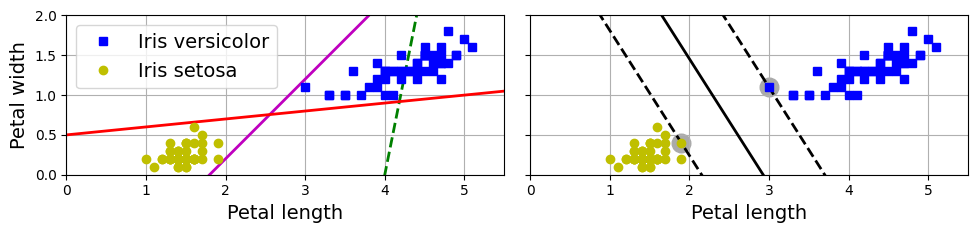

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏïÑÏù¥Î¶¨Ïä§ Ï§ë setosa vs versicolorÎßå ÏÇ¨Ïö©)
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞ ÌïôÏäµ
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# ÏÑ±Îä•Ïù¥ Ïïà Ï¢ãÏùÄ Î∂ÑÎ•òÍ∏∞ ÏòàÏãú
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# SVM Í≤∞Ï†ï Í≤ΩÍ≥Ñ Î∞è ÎßàÏßÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2)         # Í≤∞Ï†ï Í≤ΩÍ≥Ñ
    plt.plot(x0, gutter_up, "k--", linewidth=2)                # ÏúÑÏ™Ω ÎßàÏßÑ
    plt.plot(x0, gutter_down, "k--", linewidth=2)              # ÏïÑÎûòÏ™Ω ÎßàÏßÑ
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA') # ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# ÏôºÏ™Ω: ÏûòÎ™ªÎêú Î∂ÑÎ•òÍ∏∞ ÏòàÏãúÎì§
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

# Ïò§Î•∏Ï™Ω: SVMÏùò large margin Î∂ÑÎ•òÍ∏∞
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")  # Í∑∏Î¶º Ï†ÄÏû• Ìï®Ïàò (Ï†ïÏùòÎèº ÏûàÏñ¥Ïïº ÏûëÎèôÌï®)
plt.show()


ÎèÑÎ°ú(street) Î∞îÍπ•Ïóê Îçî ÎßéÏùÄ ÌõàÎ†® ÏÉòÌîåÏùÑ Ï∂îÍ∞ÄÌïòÎçîÎùºÎèÑ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóêÎäî Ï†ÑÌòÄ ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå  
‚Üí Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî ÎèÑÎ°úÏùò Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú ÏÉòÌîåÎì§ÎßåÏúºÎ°ú ÏôÑÏ†ÑÌûà Í≤∞Ï†ïÎê®(ÎòêÎäî ÏßÄÏßÄÎê®)  
‚Üí Ïù¥Îü¨Ìïú ÏÉòÌîåÎì§ÏùÑ **ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞(support vectors)** ÎùºÍ≥† Î∂ÄÎ¶Ñ(ÏúÑ Í∑∏Î¶ºÏùò Ïõê)

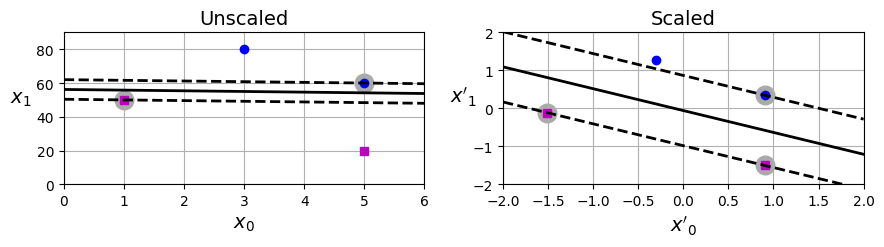

In [7]:
from sklearn.preprocessing import StandardScaler

# Í∞ÑÎã®Ìïú 2D ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ (x0, x1)
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])  # ÌÅ¥ÎûòÏä§ ÎùºÎ≤®

# Ïä§ÏºÄÏùºÎßÅ ÏóÜÏù¥ ÏÑ†Ìòï SVM ÌïôÏäµ
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# ÌäπÏÑ± Ïä§ÏºÄÏùº Ï°∞Ï†ï (ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

# Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ†Ìòï SVM Ïû¨ÌïôÏäµ
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))

# ÏôºÏ™Ω: Ïä§ÏºÄÏùº Ï°∞Ï†ï Ï†Ñ
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")  # ÌÅ¥ÎûòÏä§ 1
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")  # ÌÅ¥ÎûòÏä§ 0
plot_svc_decision_boundary(svm_clf, 0, 6)         # Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")  # Ïä§ÏºÄÏùº Ï°∞Ï†ï Ï†Ñ
plt.axis([0, 6, 0, 90])
plt.grid()

# Ïò§Î•∏Ï™Ω: Ïä§ÏºÄÏùº Ï°∞Ï†ï ÌõÑ
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")  # Ïä§ÏºÄÏùº Ï°∞Ï†ï ÌõÑ
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")  # Í∑∏Î¶º Ï†ÄÏû•
plt.show()


SVMÏùÄ ÌäπÏÑ± Ïä§ÏºÄÏùº(feature scale)Ïóê ÎØºÍ∞êÌï®

ÏôºÏ™Ω Í∑∏Î¶ºÏóêÏÑúÎäî ÏÑ∏Î°ú Ï∂ï Î≤îÏúÑÍ∞Ä Í∞ÄÎ°ú Ï∂ïÎ≥¥Îã§ Ìõ®Ïî¨ ÌÅº  
‚Üí Îî∞ÎùºÏÑú Í∞ÄÎä•Ìïú Í∞ÄÏû• ÎÑìÏùÄ ÎèÑÎ°úÎäî ÏàòÌèâÏóê Í∞ÄÍπùÍ≤å ÌòïÏÑ±Îê®

Scikit-LearnÏùò StandardScaler Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú ÌäπÏÑ± Ïä§ÏºÄÏùºÏùÑ Ï°∞Ï†ïÌïú Îí§ÏóêÎäî  
‚Üí Ïò§Î•∏Ï™Ω Í∑∏Î¶ºÏ≤òÎüº Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä Ìõ®Ïî¨ Îçî Ï†ÅÏ†àÌïòÍ≤å Î≥¥ÏûÑ

### Soft Margin Classification

**ÌïòÎìú ÎßàÏßÑ Î∂ÑÎ•ò(hard margin classification)**: Î™®Îì† ÏÉòÌîåÏù¥ ÎèÑÎ°ú(street) Î∞îÍπ•Ïóê ÏûàÏñ¥Ïïº ÌïòÍ≥†, ÎòêÌïú Ïò¨Î∞îÎ•∏ Ï™ΩÏóê ÏúÑÏπòÌï¥Ïïº ÌïúÎã§Îäî Ï°∞Í±¥ÏùÑ ÏóÑÍ≤©ÌïòÍ≤å Ï†ÅÏö©

ÌïòÎìú ÎßàÏßÑ Î∂ÑÎ•òÏùò Îëê Í∞ÄÏßÄ Î¨∏Ï†ú
1. Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÏôÑÎ≤ΩÌûà Î∂ÑÎ¶¨(linearly separable) ÎêòÏñ¥ ÏûàÏñ¥ÏïºÎßå ÏûëÎèôÌï®
2. Ïù¥ÏÉÅÏπò(outlier)Ïóê Îß§Ïö∞ ÎØºÍ∞êÌï®

Îã§Ïùå Í∑∏Î¶ºÏóêÏÑúÎäî ÏïÑÏù¥Î¶¨Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïù¥ÏÉÅÏπò Ìïú Í∞úÎßå Ï∂îÍ∞ÄÎêú ÏÉÅÌô©ÏùÑ Î≥¥Ïó¨ Ï§å



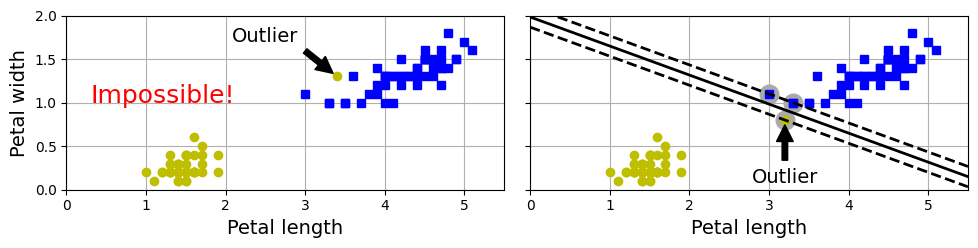

In [8]:
# Ïù¥ÏÉÅÏπò(outlier) 2Í∞ú Ï∂îÍ∞Ä
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# Ï≤´ Î≤àÏß∏ Ïù¥ÏÉÅÏπòÎßå Ìè¨Ìï® (ÌïòÎìú ÎßàÏßÑ Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞)
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# Îëê Î≤àÏß∏ Ïù¥ÏÉÅÏπòÎßå Ìè¨Ìï® (ÎßàÏßÑÏù¥ ÏôúÍ≥°ÎêòÎäî Í≤ΩÏö∞)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# ÌïòÎìú ÎßàÏßÑ SVM ÌïôÏäµ
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# ÏôºÏ™Ω: Ïù¥ÏÉÅÏπò ÎïåÎ¨∏Ïóê ÏôÑÎ≤Ω Î∂ÑÎ¶¨Í∞Ä Î∂àÍ∞ÄÎä•Ìïú ÏÉÅÌô©
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Ïò§Î•∏Ï™Ω: Ïù¥ÏÉÅÏπòÎ°ú Ïù∏Ìï¥ Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä ÌÅ¨Í≤å ÏôúÍ≥°Îêú Í≤ΩÏö∞
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate("Outlier", xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()


ÏôºÏ™Ω Í∑∏Î¶ºÏóêÏÑúÎäî ÌïòÎìú ÎßàÏßÑÏùÑ ÎßåÏ°±ÌïòÎäî Î∂ÑÎ•ò Í≤ΩÍ≥ÑÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏùå

Ïò§Î•∏Ï™Ω Í∑∏Î¶ºÏóêÏÑúÎäî Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ•ÏúºÎ°ú ÎßéÏù¥ Îã¨ÎùºÏßê  
‚Üí ÏïÑÍπå Í∑∏Î¶ºÏóêÏÑú Î¥§Îçò Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄÎäî Îß§Ïö∞ Îã§Î¶Ñ  
‚Üí Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ ÎÇòÎπ†Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

Ïù¥Îü¨Ìïú Î¨∏Ï†úÎì§ÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï¢Ä Îçî Ïú†Ïó∞Ìïú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå
Î™©ÌëúÎäî Îã§Ïùå Îëê Í∞ÄÏßÄ ÏÇ¨Ïù¥Ïùò Ï¢ãÏùÄ Í∑†ÌòïÏùÑ Ï∞æÎäî Í≤É:

1. ÎèÑÎ°ú(street)Î•º ÏµúÎåÄÌïú ÎÑìÍ≤å Ïú†ÏßÄÌï®
2. ÎßàÏßÑ ÏúÑÎ∞ò(margin violation)ÏùÑ Ï§ÑÏûÑ  
‚Üí Ï¶â, ÏÉòÌîåÏù¥ ÎèÑÎ°ú ÌïúÍ∞ÄÏö¥Îç∞ÎÇò ÏûòÎ™ªÎêú Ï™ΩÏóê ÏúÑÏπòÌïòÎäî ÏÉÅÌô© Ï†úÌïú

Ïù¥Îü¨Ìïú Î∞©ÏãùÏùÑ **ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•ò(soft margin classification)**



In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# ÏïÑÏù¥Î¶¨Ïä§ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
iris = load_iris(as_frame=True)

# ÌäπÏÑ±: ÍΩÉÏûé Í∏∏Ïù¥ÏôÄ ÎÑàÎπÑ / ÌÉÄÍπÉ: Iris virginica Ïó¨Î∂Ä (Ïù¥ÏßÑ Î∂ÑÎ•ò)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # virginicaÎ©¥ True, ÏïÑÎãàÎ©¥ False

# SVM Î∂ÑÎ•òÍ∏∞ Íµ¨ÏÑ±: ÌëúÏ§ÄÌôî + ÏÑ†Ìòï SVM
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))

# Î™®Îç∏ ÌïôÏäµ
svm_clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [10]:
X_new = [[5.5, 1.7], [5.0, 1.5]]  # ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† ÏÉàÎ°úÏö¥ ÍΩÉÏûé Í∏∏Ïù¥/ÎÑàÎπÑ ÏÉòÌîå
svm_clf.predict(X_new)           # Í∞Å ÏÉòÌîåÏù¥ Iris virginicaÏù∏ÏßÄ ÏòàÏ∏° (True/False)


array([ True, False])

In [11]:
svm_clf.decision_function(X_new)  # Í∞Å ÏÉòÌîåÏóê ÎåÄÌïú Í≤∞Ï†ï Ï†êÏàò Ï∂úÎ†• (ÏñëÏàòÎ©¥ ÌÅ¥ÎûòÏä§ 1, ÏùåÏàòÎ©¥ ÌÅ¥ÎûòÏä§ 0)


array([ 0.66163411, -0.22036063])

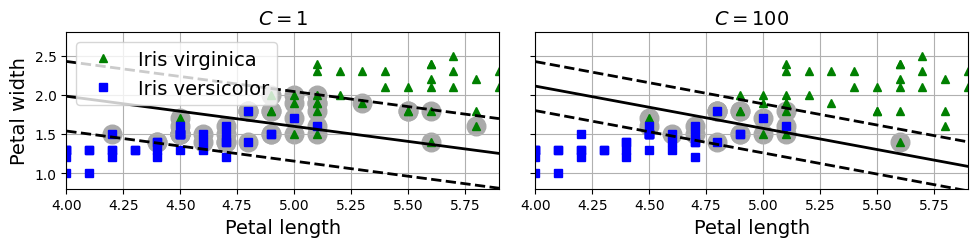

In [12]:
# ÌëúÏ§ÄÌôî + ÏÑúÎ°ú Îã§Î•∏ C Í∞íÏùÑ Í∞ÄÏßÑ SVM Î™®Îç∏ ÏÉùÏÑ±
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

# ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

# Î™®Îç∏ ÌïôÏäµ (Ïä§ÏºÄÏùºÎßÅ Ìè¨Ìï®)
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Ïä§ÏºÄÏùºÎßÅ ÎêòÏßÄ ÏïäÏùÄ Í≥µÍ∞ÑÏóêÏÑú ÌååÎùºÎØ∏ÌÑ∞ Í≥ÑÏÇ∞ (Ìï¥ÏÑùÏö©)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# LinearSVCÎäî ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú ÏßÅÏ†ë Í≥ÑÏÇ∞
t = y * 2 - 1  # ÌÅ¥ÎûòÏä§: 0 ‚Üí -1, 1 ‚Üí +1
support_vectors_idx1 = (t.to_numpy() * (X.dot(w1) + b1) < 1)
support_vectors_idx2 = (t.to_numpy() * (X.dot(w2) + b2) < 1)
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# C = 1 Í≤∞Í≥º
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# C = 100 Í≤∞Í≥º
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()


Scikit-LearnÏóêÏÑú SVM Î™®Îç∏ÏùÑ ÎßåÎì§ ÎïåÎäî Ïó¨Îü¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï† Ïàò ÏûàÎäîÎç∞
Í∑∏Ï§ë ÌïòÎÇòÍ∞Ä C

- CÎ•º ÏûëÍ≤å ÏÑ§Ï†ïÌïòÎ©¥ ‚Üí ÏúÑ Í∑∏ÎûòÌîÑÏùò ÏôºÏ™ΩÏ≤òÎüº ÎÇòÏò¥
- CÎ•º ÌÅ¨Í≤å ÏÑ§Ï†ïÌïòÎ©¥ ‚Üí Ïò§Î•∏Ï™ΩÏ≤òÎüº ÎÇòÏò¥

ÎßàÏßÑ ÏúÑÎ∞òÏùÄ Î∞îÎûåÏßÅÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏùå  
ÌïòÏßÄÎßå Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÏôºÏ™Ω Î™®Îç∏Ïù¥ ÎßàÏßÑ ÏúÑÎ∞òÏùÄ ÎßéÏßÄÎßå, ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÄ Îçî Ï¢ãÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå

ÎßåÏïΩ SVM Î™®Îç∏Ïù¥ Í≥ºÏ†ÅÌï©(overfitting) ÎêòÍ≥† ÏûàÎã§Î©¥, C Í∞íÏùÑ ÎÇÆÏ∂∞ÏÑú Ï†ïÍ∑úÌôî(regularization) ÌïòÎäî Í≤ÉÏùÑ ÏãúÎèÑÌï† Ïàò ÏûàÏùå

Îã§ÏùåÏùÄ Scikit-Learn ÏΩîÎìúÎ°ú, ÏïÑÏù¥Î¶¨Ïä§(iris) Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§Í≥†, ÌäπÏÑ±(feature)ÏùÑ Ïä§ÏºÄÏùºÎßÅÌïú Îã§Ïùå, ÏÑ†Ìòï SVM Î™®Îç∏(LinearSVC ÌÅ¥ÎûòÏä§, C=1, hinge ÏÜêÏã§ Ìï®Ïàò)ÏùÑ ÏÇ¨Ïö©Ìï¥ Iris virginica ÌíàÏ¢ÖÏùÑ ÌåêÎ≥ÑÌïòÎäî ÌõàÎ†® ÏàòÌñâ



```
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # ÍΩÉÏûé Í∏∏Ïù¥ÏôÄ ÎÑàÎπÑ
y = (iris["target"] == 2).astype(np.float64)  # Iris virginicaÏù∏ÏßÄ Ïó¨Î∂Ä

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

```

Ïù¥Î†áÍ≤å ÌïôÏäµÎêú Î™®Îç∏ÏùÄ ÏúÑ Í∑∏ÎûòÌîÑ ÏôºÏ™ΩÏóê ÏãúÍ∞ÅÌôî

ÏòàÏ∏°

```
svm_clf.predict([[5.5, 1.7]])
# Í≤∞Í≥º: array([1.])

```

Logistic RegressionÍ≥ºÎäî Îã¨Î¶¨  
**SVM Î∂ÑÎ•òÍ∏∞(SVM classifier)**Îäî Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†ÏùÑ Ï∂úÎ†•ÌïòÏßÄ ÏïäÏùå



- LinearSVC ÎåÄÏã† SVC ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©: SVC(kernel="linear", C=1)

- SGDClassifier ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©: SGDClassifier(loss="hinge", alpha=1/(m*C))

ÏùºÎ∞òÏ†ÅÏù∏ ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(Stochastic Gradient Descent)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞ ÌïôÏäµ

LinearSVCÎßåÌÅº Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÏßÑ ÏïäÏßÄÎßå, Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏÉÅÌô©ÏóêÏÑú Ïú†Ïö©
- Ïò®ÎùºÏù∏ Î∂ÑÎ•ò(online classification)
- Î©îÎ™®Î¶¨Ïóê Ïò¨Î¶¥ Ïàò ÏóÜÏùÑ Ï†ïÎèÑÎ°ú ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖã (out-of-core training)

LinearSVC ÌÅ¥ÎûòÏä§Îäî **Ï†àÌé∏ Ìï≠(bias term)**ÎèÑ Ï†ïÍ∑úÌôî(regulazation)Ìï®  
Îî∞ÎùºÏÑú ÌõàÎ†® ÏÑ∏Ìä∏Î•º ÌèâÍ∑† Ï§ëÏã¨ÏúºÎ°ú Ïù¥Îèô(center)ÏãúÏºúÏïº  
‚Üí StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨Îê®

loss ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî Í∏∞Î≥∏Í∞íÏù¥ "hinge"Í∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌï¥Ïïº Ìï®

Í∑∏Î¶¨Í≥† Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ ÏúÑÌï¥ÏÑúÎäî dual=FalseÎ°ú ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå  
ÌäπÏÑ± ÏàòÍ∞Ä ÌõàÎ†® ÏÉòÌîå ÏàòÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞ÏóêÎäî ÏòàÏô∏(Ïù¥Í±¥ Îí§ÏóêÏÑú Îã§Î£∏)

## Nonlinear SVM Classification

ÎπÑÎ°ù ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞Í∞Ä Ìö®Ïú®Ï†ÅÏù¥Í≥† ÎßéÏùÄ Í≤ΩÏö∞ÏóêÏÑú Ïûò ÏûëÎèôÌïòÏßÄÎßå,  
ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂Ñ(linearly separable)ÎêòÏßÄ ÏïäÍ∏∞ÎèÑ Ìï®

ÎπÑÏÑ†Ìòï(nonlinear) Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Î£®Îäî Ìïú Í∞ÄÏßÄ Î∞©Î≤ïÏùÄ: ÌäπÏÑ±ÏùÑ Îçî Ï∂îÍ∞ÄÌïòÎäî Í≤É   
4Ïû•ÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº **Îã§Ìï≠ ÌäπÏÑ±(polynomial features)**ÏùÑ Ï∂îÍ∞ÄÌïòÎäî Î∞©Î≤ï  
ÏùºÎ∂Ä Í≤ΩÏö∞ÏóêÎäî Ïù¥Î†áÍ≤å ÌïòÎ©¥ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂Ñ Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î≥ÄÌôòÎê† Ïàò ÏûàÏùå

ÏúÑ Í∑∏ÎûòÌîÑÏùò ÏôºÏ™Ω Í∑∏Î¶ºÏùÄ Îã® ÌïòÎÇòÏùò ÌäπÏÑ± x‚ÇÅÏùÑ Í∞ÄÏßÑ Í∞ÑÎã®Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã  
Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÌï† Ïàò ÏóÜÏùå ‚Äî

ÌïòÏßÄÎßå Îëê Î≤àÏß∏ ÌäπÏÑ±ÏúºÎ°ú x‚ÇÇ = (x‚ÇÅ)¬≤ÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥, Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑ 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏôÑÏ†ÑÌûà ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂Ñ Í∞ÄÎä•

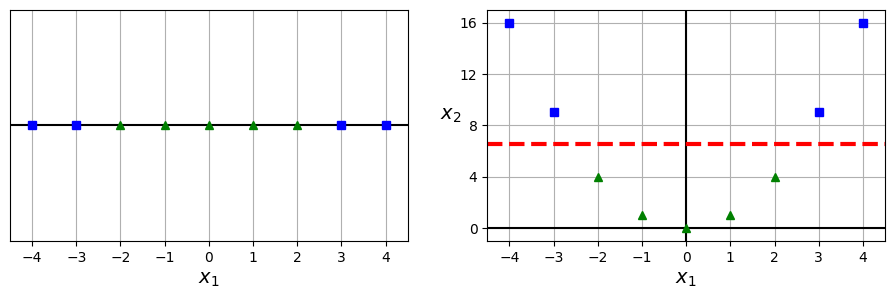

In [13]:
# 1Ï∞®Ïõê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±: x‚ÇÇ = x‚ÇÅ¬≤ Ï∂îÍ∞Ä
X2D = np.c_[X1D, X1D**2]

# ÌÉÄÍ≤ü Î†àÏù¥Î∏î Ï†ïÏùò (0 ÎòêÎäî 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

# ÏôºÏ™Ω Í∑∏Î¶º: ÏõêÎûòÏùò 1Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # xÏ∂ï
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")  # ÌÅ¥ÎûòÏä§ 0: ÌååÎûÄ ÏÇ¨Í∞ÅÌòï
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")  # ÌÅ¥ÎûòÏä§ 1: Ï¥àÎ°ù ÏÇºÍ∞ÅÌòï
plt.gca().get_yaxis().set_ticks([])  # yÏ∂ï ÎààÍ∏à Ï†úÍ±∞
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

# Ïò§Î•∏Ï™Ω Í∑∏Î¶º: x‚ÇÅ, x‚ÇÇ=(x‚ÇÅ)¬≤ 2Ï∞®Ïõê Í≥µÍ∞ÑÏúºÎ°ú Î≥ÄÌôòÌïú Îç∞Ïù¥ÌÑ∞
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')  # xÏ∂ï
plt.axvline(x=0, color='k')  # yÏ∂ï
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")  # ÌÅ¥ÎûòÏä§ 0
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")  # ÌÅ¥ÎûòÏä§ 1
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # ÏÑ†Ìòï Í≤∞Ï†ï Í≤ΩÍ≥Ñ
plt.axis([-4.5, 4.5, -1, 17])

# Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.subplots_adjust(right=1)

# Í∑∏Î¶º Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()


Scikit-LearnÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ ÏïÑÏù¥ÎîîÏñ¥Î•º Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ PolynomialFeatures Î≥ÄÌôòÍ∏∞ Îã§ÏùåÏóê  
StandardScalerÏôÄ LinearSVCÎ•º Ìè¨Ìï®ÌïòÎäî PipelineÏùÑ ÏÉùÏÑ±

Îç∞Ïù¥ÌÑ∞ÏÖã: Ïù¥ÏßÑ Î∂ÑÎ•òÎ•º ÏúÑÌïú Ïû•ÎÇúÍ∞ê Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§Ïù¥ Îëê Í∞úÏùò ÏÑúÎ°ú ÏóáÍ∞àÎ¶∞ Î∞òÏõê ÌòïÌÉúÎ°ú Íµ¨ÏÑ±

make_moons() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± Í∞ÄÎä•

In [14]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Î∞òÎã¨ Î™®Ïñë Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÎÖ∏Ïù¥Ï¶à Ìè¨Ìï®)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),              # 3Ï∞® Îã§Ìï≠ ÌäπÏÑ± ÏÉùÏÑ±
    StandardScaler(),                          # ÌëúÏ§ÄÌôî
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)  # ÏÑ†Ìòï SVM ÌïôÏäµ
)

polynomial_svm_clf.fit(X, y)  # Î™®Îç∏ ÌõàÎ†®


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

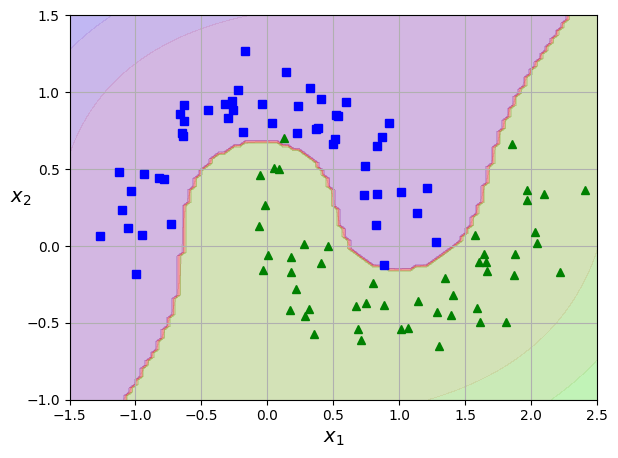

In [15]:
def plot_dataset(X, y, axes):
    # ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    # ÏòàÏ∏° Î∞è Í≤∞Ï†ï Ìï®Ïàò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Í∑∏Î¶¨Îìú ÏÉùÏÑ±
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    # ÏòàÏ∏° Í≤∞Í≥º Î∞è Í≤∞Ï†ï Ìï®Ïàò Í∞í Í≥ÑÏÇ∞
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # Î∂ÑÎ•ò Í≤ΩÍ≥ÑÏôÄ Í≤∞Ï†ï Ìï®Ïàò ÏãúÍ∞ÅÌôî
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# ÏòàÏ∏° Í≤∞Í≥º Î∞è Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()


### Polynomial Kernel

Îã§Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÎäî Í≤ÉÏùÄ Íµ¨ÌòÑÏù¥ Í∞ÑÎã®ÌïòÎ©∞ SVMÎøê ÏïÑÎãàÎùº Îã§ÏñëÌïú Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÍ≥º Ïûò ÏûëÎèôÌï®

ÌïòÏßÄÎßå Îã§Ìï≠ Ï∞®ÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ΩÏö∞ Îß§Ïö∞ Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏóÜÏùå  
Ï∞®ÏàòÍ∞Ä ÎÜíÏùÑ Í≤ΩÏö∞ ÌäπÏÑ±Ïùò ÏàòÍ∞Ä Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÏó¨ Î™®Îç∏Ïù¥ Îß§Ïö∞ ÎäêÎ†§Ïßê

SVMÏùÑ ÏÇ¨Ïö©Ìï† ÎïåÎäî **Ïª§ÎÑê Ìä∏Î¶≠**Ïù¥Îùº Î∂àÎ¶¨Îäî ÏàòÌïôÏ†Å Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÏùå

- Ïª§ÎÑê Ìä∏Î¶≠ÏùÄ Ïã§Ï†úÎ°ú ÎßéÏùÄ Îã§Ìï≠ ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÍ≥†ÎèÑ ÎßàÏπò Ï∂îÍ∞ÄÌïú Í≤ÉÍ≥º Í∞ôÏùÄ Ìö®Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÍ≤å Ìï¥ Ï§å
- Îî∞ÎùºÏÑú ÌäπÏÑ± ÏàòÏùò Ï°∞Ìï©Ï†Å Ìè≠Î∞úÏù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÏùå
- ÏôúÎÉêÌïòÎ©¥ Ïã§Ï†úÎ°ú Ïñ¥Îñ§ ÌäπÏÑ±ÎèÑ Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏
- Ïù¥ Ìä∏Î¶≠ÏùÄ SVC ÌÅ¥ÎûòÏä§Ïóê ÏùòÌï¥ Íµ¨ÌòÑÎêòÏñ¥ ÏûàÏùå


In [16]:
from sklearn.svm import SVC

# 3Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVM Î∂ÑÎ•òÍ∏∞ Íµ¨ÏÑ± Î∞è ÌïôÏäµ
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),                      # ÌäπÏÑ± ÌëúÏ§ÄÌôî
    SVC(kernel="poly", degree=3, coef0=1, C=5)  # Îã§Ìï≠ Ïª§ÎÑê SVM ÏÑ§Ï†ï
)
poly_kernel_svm_clf.fit(X, y)  # Î™®Îç∏ ÌõàÎ†®


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Ïù¥ ÏΩîÎìúÎäî 3Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVM Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµÏãúÌÇ¥ (Îã§Ïùå Í∑∏ÎûòÌîÑÏùò ÏôºÏ™Ω)  
Ïò§Î•∏Ï™ΩÏóêÎäî 10Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî Îòê Îã§Î•∏ SVM Î∂ÑÎ•òÍ∏∞

Î™®Îç∏Ïù¥ Í≥ºÏ†ÅÌï©ÎêòÍ≥† ÏûàÎã§Î©¥ Îã§Ìï≠ Ï∞®ÏàòÎ•º Ï§ÑÏù¥Îäî Í≤ÉÏù¥ Ï¢ãÏùå   Í≥ºÏÜåÏ†ÅÌï©Ïù¥ÎùºÎ©¥ Ï∞®ÏàòÎ•º ÎäòÎ†§Î≥º Ïàò ÏûàÏùå

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ coef0: Í≥†Ï∞® Îã§Ìï≠ÏãùÍ≥º Ï†ÄÏ∞® Îã§Ìï≠Ïãù Ï§ë Ïñ¥Îäê Ï™ΩÏóê Îçî ÏòÅÌñ•ÏùÑ Î∞õÏùÑÏßÄÎ•º Ï°∞Ï†à


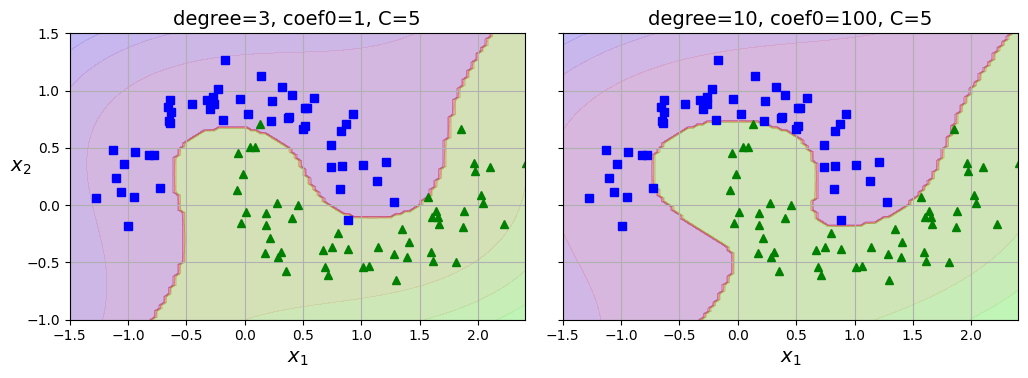

In [17]:
# 10Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVM Î∂ÑÎ•òÍ∏∞ ÌïôÏäµ
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

# Îëê Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÎÇòÎûÄÌûà ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")  # 3Ï∞® Ïª§ÎÑê Í≤∞Í≥º

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")  # 10Ï∞® Ïª§ÎÑê Í≤∞Í≥º
plt.ylabel("")

# Í∑∏ÎûòÌîÑ Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()



Ï†ÅÏ†àÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùÑ Ï∞æÎäî ÏùºÎ∞òÏ†ÅÏù∏ Ï†ëÍ∑º Î∞©Ïãù: **Í∑∏Î¶¨Îìú ÏÑúÏπò(grid search)** ÏÇ¨Ïö©

Î≥¥ÌÜµÏùÄ Î®ºÏ†Ä Í±∞Ïπú Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏàòÌñâÌïú Îã§Ïùå  
ÏµúÏ†ÅÍ∞í Ï£ºÎ≥ÄÏóêÏÑú Îçî ÏÑ∏Î∞ÄÌïú Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏàòÌñâ

### Similarity Features

ÎπÑÏÑ†Ìòï Î¨∏Ï†úÎ•º Îã§Î£®Îäî Îòê Îã§Î•∏ Í∏∞Î≤ï  
-> Ïú†ÏÇ¨ÎèÑ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Í≥ÑÏÇ∞Ìïú ÌäπÏÑ±ÏùÑ Ï∂îÍ∞Ä  
Ïù¥ Ìï®ÏàòÎäî Í∞Å ÏÉòÌîåÏù¥ ÌäπÏ†ï ÎûúÎìúÎßàÌÅ¨ÏôÄ ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄ Ï∏°Ï†ï

ÏòàÎ•º Îì§Ïñ¥ ÏïûÏÑú Îã§Î£¨ 1Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÎûúÎìúÎßàÌÅ¨ Îëê Í∞úÎ•º $x_1 = -2$ÏôÄ $x_1 = 1$Ïóê Ï∂îÍ∞ÄÌïúÎã§Í≥† Í∞ÄÏ†ï(ÏïÑÎûò Í∑∏ÎûòÌîÑÏùò ÏôºÏ™Ω Ï∞∏Í≥†)

Í∑∏Îã§Ïùå Ïú†ÏÇ¨ÎèÑ Ìï®ÏàòÎ°ú **Í∞ÄÏö∞ÏãúÏïà RBF(Radial Basis Function)** Ï†ïÏùò, Œ≥Îäî 0.3ÏúºÎ°ú ÏÑ§Ï†ï

$$
\phi_{\gamma}(\mathbf{x}, \ell) = \exp\left(-\gamma \lVert \mathbf{x} - \ell \rVert^2\right)
$$



Ïù¥ Ìï®ÏàòÎäî Ï¢Ö Î™®Ïñë ÌòïÌÉúÎ°ú ÎûúÎìúÎßàÌÅ¨ÏóêÏÑú Î©ÄÏàòÎ°ù 0Ïóê Í∞ÄÍπåÏõåÏßÄÍ≥†, ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπòÏóêÏÑúÎäî 1Ïóê ÎèÑÎã¨

ÏòàÎ•º Îì§Ïñ¥
$x_1 = 1$Ïù∏ ÏÉòÌîåÏùÑ Î≥¥Î©¥ Ï≤´ Î≤àÏß∏ ÎûúÎìúÎßàÌÅ¨ÏóêÏÑú Í±∞Î¶¨ 1,   
Îëê Î≤àÏß∏ ÎûúÎìúÎßàÌÅ¨ÏóêÏÑú Í±∞Î¶¨ 2 Îñ®Ïñ¥Ï†∏ ÏûàÏùå

Îî∞ÎùºÏÑú Ïù¥ ÏÉòÌîåÏùò ÏÉà ÌäπÏÑ±ÏùÄ
- $x_2 = \exp(-0.3 \cdot 1^2) \approx 0.74$
- $x_3 = \exp(-0.3 \cdot 2^2) \approx 0.30$

Í∑∏Î¶º Ïò§Î•∏Ï™ΩÏùÄ Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ÏÖã(Í∏∞Ï°¥ ÌäπÏÑ± Ï†úÍ±∞)  
Ïù¥Ï†ú ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂Ñ Í∞ÄÎä•

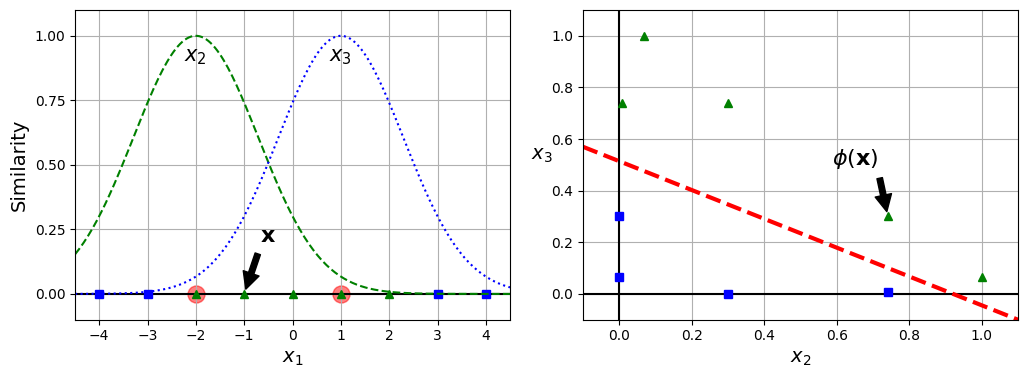

In [18]:
def gaussian_rbf(x, landmark, gamma):
    # Í∞ÄÏö∞ÏãúÏïà RBF Ïú†ÏÇ¨ÎèÑ Ìï®Ïàò Í≥ÑÏÇ∞
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# 1Ï∞®Ïõê ÏûÖÎ†•Í∞í ÏÉùÏÑ±
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
# Îëê ÎûúÎìúÎßàÌÅ¨Ïóê ÎåÄÌïú Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Î≥ÄÌôòÎêú ÌäπÏÑ± Í≥µÍ∞Ñ Íµ¨ÏÑ±
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

# ÏõêÎûò 1D Îç∞Ïù¥ÌÑ∞ÏôÄ ÎûúÎìúÎßàÌÅ¨ Í∏∞Î∞ò Ïú†ÏÇ¨ÎèÑ ÏãúÍ∞ÅÌôî
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # xÏ∂ï Í∏∞Ï§ÄÏÑ†
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")  # ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")  # ÌÅ¥ÎûòÏä§ 0
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")  # ÌÅ¥ÎûòÏä§ 1
plt.plot(x1s, x2s, "g--")  # Ï≤´ Î≤àÏß∏ ÎûúÎìúÎßàÌÅ¨ Ïú†ÏÇ¨ÎèÑ Í≥°ÏÑ†
plt.plot(x1s, x3s, "b:")   # Îëê Î≤àÏß∏ ÎûúÎìúÎßàÌÅ¨ Ïú†ÏÇ¨ÎèÑ Í≥°ÏÑ†
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞òÏúºÎ°ú Î≥ÄÌôòÎêú ÌäπÏÑ± Í≥µÍ∞Ñ ÏãúÍ∞ÅÌôî
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")  # ÌÅ¥ÎûòÏä§ 0
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")  # ÌÅ¥ÎûòÏä§ 1
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
# ÏÑ†Ìòï Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("kernel_method_plot")
plt.show()


ÎûúÎìúÎßàÌÅ¨Î•º Ïñ¥ÎñªÍ≤å ÏÑ†ÌÉùÌïòÎäîÍ∞Ä?

Í∞ÄÏû• Îã®ÏàúÌïú Î∞©Î≤ïÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î™®Îì† ÏÉòÌîå ÏúÑÏπòÏóê Í∞ÅÍ∞Å ÌïòÎÇòÏî© ÎûúÎìúÎßàÌÅ¨Î•º ÎßåÎìúÎäî Í≤É

Ïù¥Î†áÍ≤å ÌïòÎ©¥ Ï∞®ÏõêÏù¥ Îß§Ïö∞ ÎßéÏïÑÏßÄÍ≥†, Í∑∏ Í≤∞Í≥º Î≥ÄÌôòÎêú ÌõàÎ†®ÏÖãÏù¥ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÎê† Í∞ÄÎä•ÏÑ± ÎÜíÏïÑÏßê

Îã®Ï†êÏùÄ ÏÉòÌîå ÏàòÍ∞Ä ùëö, ÌäπÏÑ± ÏàòÍ∞Ä ùëõÏùº Îïå ÏõêÎûò ÌäπÏÑ±ÏùÑ Ï†úÍ±∞ÌïúÎã§Í≥† Í∞ÄÏ†ïÌïòÎ©¥  
ÌõàÎ†®ÏÖãÏù¥ ùëöÍ∞úÏùò ÏÉòÌîåÍ≥º ùëöÍ∞úÏùò ÌäπÏÑ±ÏùÑ Í∞ÄÏßÄÍ≤å Îê®

ÌõàÎ†®ÏÖãÏù¥ ÏïÑÏ£º ÌÅ∞ Í≤ΩÏö∞ ÌäπÏÑ± ÏàòÎèÑ Í∑∏ÎßåÌÅº Ïª§Ïßê

### Gaussian RBF Kernel


Îã§Ìï≠ ÌäπÏÑ±Í≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïú†ÏÇ¨ÎèÑ ÌäπÏÑ± Í∏∞Î≤ïÎèÑ Îã§ÏñëÌïú Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏóê ÌôúÏö© Í∞ÄÎä•

ÌïòÏßÄÎßå ÌõàÎ†®ÏÖãÏù¥ ÌÅ¨Î©¥ Ï∂îÍ∞Ä ÌäπÏÑ± Í≥ÑÏÇ∞Ïóê ÎßéÏùÄ Ïó∞ÏÇ∞ ÎπÑÏö© Î∞úÏÉù

Ïù¥Îü¥ ÎïåÎèÑ Ïª§ÎÑê Ìä∏Î¶≠Ïù¥ SVMÏóêÏÑú Ïú†Ïö©ÌïòÍ≤å ÏûëÎèôÌï® Ïú†ÏÇ¨ÎèÑ ÌäπÏÑ±ÏùÑ ÎßéÏù¥ Ï∂îÍ∞ÄÌïú Í≤ÉÍ≥º ÎπÑÏä∑Ìïú Ìö®Í≥ºÎ•º Í≥ÑÏÇ∞ ÏóÜÏù¥ ÏñªÏùÑ Ïàò ÏûàÏùå

‚ñΩ Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVC Î™®Îç∏

In [19]:
# RBF Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVM Î∂ÑÎ•òÍ∏∞ Íµ¨ÏÑ± Î∞è ÌïôÏäµ
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),                    # ÌäπÏÑ± ÌëúÏ§ÄÌôî
    SVC(kernel="rbf", gamma=5, C=0.001)  # RBF Ïª§ÎÑê SVM ÏÑ§Ï†ï
)
rbf_kernel_svm_clf.fit(X, y)  # Î™®Îç∏ ÌõàÎ†®


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

Ïù¥ Î™®Îç∏ÏùÄ ÏïÑÎûò Í∑∏ÎûòÌîÑÏùò ÏôºÏ™Ω ÏïÑÎûòÏóê ÏãúÍ∞ÅÌôî

Îã§Î•∏ Í∑∏Î¶ºÎì§ÏùÄ gamma(Œ≥)ÏôÄ C Í∞íÏùÑ Îã¨Î¶¨Ìïú Î™®Îç∏Îì§ Î≥¥Ïó¨ Ï§å

gammaÎ•º ÌÅ¨Í≤å ÌïòÎ©¥ Ï¢Ö Î™®Ïñë Ïª§ÎÑêÏù¥ Ï¢ÅÏïÑÏßê  
Í∞Å ÏÉòÌîåÏùò ÏòÅÌñ• Î≤îÏúÑ ÏûëÏïÑÏßÄÍ≥† Í≤∞Ï†ï Í≤ΩÍ≥ÑÍ∞Ä ÏÉòÌîå ÌïòÎÇòÌïòÎÇòÎ•º Îî∞Îùº Îçî Î∂àÍ∑úÏπôÌïòÍ≤å Î≥ÄÌï®

gammaÍ∞Ä ÏûëÏúºÎ©¥ Ïª§ÎÑêÏù¥ ÎÑìÏñ¥ÏßÄÍ≥† ÏòÅÌñ• Î≤îÏúÑ Ïª§Ïßê   
Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî Îçî Î∂ÄÎìúÎü¨ÏõåÏßê

Ï¶â gammaÎäî Ï†ïÍ∑úÌôî Ïó≠Ìï†ÏùÑ ÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ï≤òÎüº ÏûëÎèô  
Í≥ºÏ†ÅÌï©Ïù¥Î©¥ gamma Ï§ÑÏù¥Í≥† Í≥ºÏÜåÏ†ÅÌï©Ïù¥Î©¥ gamma ÎäòÎ¶¨Îäî Î∞©ÏãùÏúºÎ°ú Ï°∞Ï†à Í∞ÄÎä•(C ÌååÎùºÎØ∏ÌÑ∞ÏôÄ Ïú†ÏÇ¨)

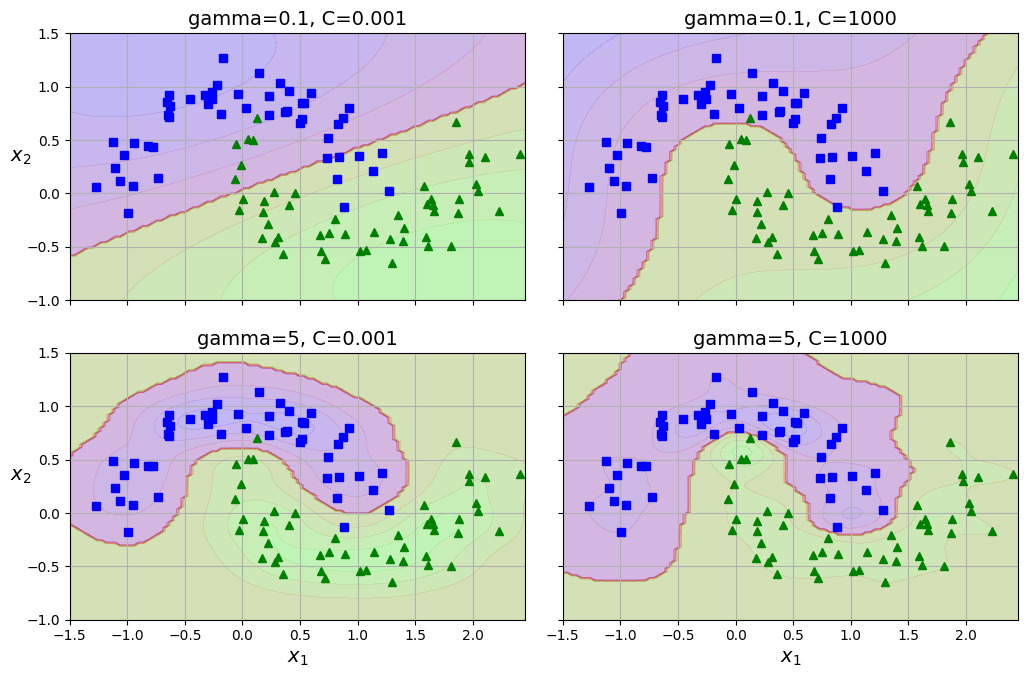

In [20]:
from sklearn.svm import SVC

# ÎÑ§ Í∞ÄÏßÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© Ï†ïÏùò (gamma, C)
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# Í∞Å Ï°∞Ìï©ÏúºÎ°ú SVM Î™®Îç∏ ÌïôÏäµ
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# 2x2 Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

# Í∞Å Î™®Îç∏ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

# Í≤∞Í≥º Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("moons_rbf_svc_plot")
plt.show()


Îã§Î•∏ Ïª§ÎÑêÎì§ÎèÑ Ï°¥Ïû¨ÌïòÏßÄÎßå Ìõ®Ïî¨ Îçú ÏÇ¨Ïö©Îê®

ÏùºÎ∂Ä Ïª§ÎÑêÏùÄ ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ïóê ÌäπÌôî
ÏòàÎ•º Îì§Ïñ¥ Î¨∏ÏûêÏó¥ Ïª§ÎÑêÏùÄ ÌÖçÏä§Ìä∏ Î¨∏ÏÑúÎÇò DNA ÏÑúÏó¥ Î∂ÑÎ•ò Ïãú Í∞ÄÎÅî ÏÇ¨Ïö©  
(string subsequence kernelÏù¥ÎÇò Levenshtein Í±∞Î¶¨ Í∏∞Î∞ò Ïª§ÎÑê Îì±)


Ïù¥Ï≤òÎüº Ïª§ÎÑêÏù¥ ÎßéÏùÑ Îïå Ïñ¥Îñ§ Í±∏ ÏÑ†ÌÉùÌï†ÏßÄ Ïñ¥ÎñªÍ≤å ÌåêÎã®Ìï† Ïàò ÏûàÏùÑÍπå?

ÏùºÎ∞òÏ†ÅÏù∏ Í∏∞Ï§ÄÏúºÎ°úÎäî Ìï≠ÏÉÅ ÏÑ†Ìòï Ïª§ÎÑêÏùÑ Î®ºÏ†Ä ÏãúÎèÑÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå  
(ÌäπÌûà ÌõàÎ†®ÏÖãÏù¥ Îß§Ïö∞ ÌÅ¨Í±∞ÎÇò ÌäπÏÑ±Ïù¥ ÎßéÏùÄ Í≤ΩÏö∞ÏóêÎäî SVC(kernel="linear")Î≥¥Îã§ LinearSVCÍ∞Ä Ìõ®Ïî¨ Îπ†Î¶Ñ)

ÌõàÎ†®ÏÖãÏù¥ ÎÑàÎ¨¥ ÌÅ¨ÏßÄ ÏïäÎã§Î©¥ Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑêÎèÑ Ìï®Íªò ÏãúÎèÑÌï¥ Î≥º ÎßåÌï®
ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ÏóêÏÑú Ïûò ÏûëÎèô

ÏãúÍ∞ÑÍ≥º ÏûêÏõêÏù¥ Ï∂©Î∂ÑÌïòÎã§Î©¥ ÍµêÏ∞® Í≤ÄÏ¶ùÍ≥º Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÌÜµÌï¥ Îã§Î•∏ Ïª§ÎÑêÎì§ÎèÑ Ïã§Ìóò Í∞ÄÎä•
ÌäπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ïóê ÌäπÌôîÎêú Ïª§ÎÑêÏù¥ ÏûàÎã§Î©¥ Í∑∏Îü∞ Í≤ΩÏö∞Ïóî Ïã§ÌóòÌï¥ Î≥º Í∞ÄÏπò ÏûàÏùå

### Computational Complexity

LinearSVC ÌÅ¥ÎûòÏä§Îäî liblinear ÎùºÏù¥Î∏åÎü¨Î¶¨ Í∏∞Î∞ò
Ïù¥ ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî ÏÑ†Ìòï SVMÏùÑ ÏúÑÌïú ÏµúÏ†ÅÌôîÎêú ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ

Ïª§ÎÑê Ìä∏Î¶≠ÏùÄ ÏßÄÏõêÌïòÏßÄ ÏïäÏßÄÎßå, ÌõàÎ†® ÏÉòÌîå ÏàòÏôÄ ÌäπÏÑ± ÏàòÏóê Í±∞Ïùò ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÌôïÏû•
ÌïôÏäµ ÏãúÍ∞Ñ Î≥µÏû°ÎèÑÎäî ÎåÄÎûµ ùëÇ(ùëö√óùëõ)

Ï†ïÎ∞ÄÎèÑÎ•º ÎÜíÍ≤å ÏöîÍµ¨Ìï†ÏàòÎ°ù ÌïôÏäµ ÏãúÍ∞ÑÏùÄ Í∏∏Ïñ¥Ïßê  
Ïù¥Îäî ÌóàÏö© Ïò§Ï∞® ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ùúñ(Scikit-LearnÏóêÏÑúÎäî tol)Î°ú Ï°∞Ï†à Í∞ÄÎä•  
ÏùºÎ∞òÏ†ÅÏù∏ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑúÎäî Í∏∞Î≥∏Í∞íÏúºÎ°ú Ï∂©Î∂Ñ

SVC ÌÅ¥ÎûòÏä§Îäî libsvm ÎùºÏù¥Î∏åÎü¨Î¶¨ Í∏∞Î∞ò
Ïù¥ ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî Ïª§ÎÑê Ìä∏Î¶≠ÏùÑ ÏßÄÏõêÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ

ÌïôÏäµ ÏãúÍ∞Ñ Î≥µÏû°ÎèÑÎäî Î≥¥ÌÜµ ùëÇ(ùëö^2√óùëõ)ÏóêÏÑú ùëÇ(ùëö^3√óùëõ) ÏÇ¨Ïù¥  
-> ÏÉòÌîå ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÌïôÏäµÏù¥ Îß§Ïö∞ ÎäêÎ†§Ïßê  
(Ïòà: ÏàòÏã≠Îßå Í∞ú Ïù¥ÏÉÅÏùò ÏÉòÌîåÏù¥ ÏûàÎäî Í≤ΩÏö∞)

Ïù¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Î≥µÏû°ÌïòÏßÄÎßå ÌÅ¨Í∏∞Í∞Ä ÏûëÍ±∞ÎÇò Ï§ëÍ∞Ñ Ï†ïÎèÑÏù∏ ÌõàÎ†®ÏÖãÏóê Ï†ÅÌï©  
ÌäπÏÑ± ÏàòÍ∞Ä ÎßéÏïÑÎèÑ Ïûò ÏûëÎèô  
ÌäπÌûà Ìù¨ÏÜå ÌäπÏÑ±(ÎåÄÎ∂ÄÎ∂Ñ 0Ïù∏ Í≤ΩÏö∞)ÏóêÏÑúÎäî Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏûëÎèô  
Ïù¥ Í≤ΩÏö∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú nonzero ÌäπÏÑ± ÏàòÏóê ÎπÑÎ°ÄÌï¥ÏÑú ÌôïÏû•  

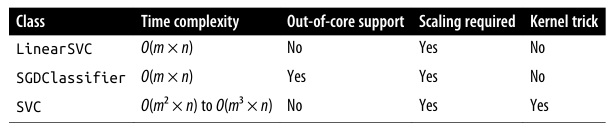

## SVM Regression

SVM ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï Î∂ÑÎ•òÎ•º ÏßÄÏõêÌï† Îøê ÏïÑÎãàÎùº, ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï ÌöåÍ∑ÄÎèÑ Í∞ÄÎä•

SVMÏùÑ Î∂ÑÎ•òÍ∞Ä ÏïÑÎãå ÌöåÍ∑ÄÏóê ÏÇ¨Ïö©ÌïòÎäî ÌïµÏã¨: Î™©Ï†ÅÏùÑ Ïó≠Ï†ÑÏãúÌÇ§Îäî Í≤É(reverse the objective)  
- Î∂ÑÎ•ò: Í∞ÄÎä•Ìïú Ìïú Îëê ÌÅ¥ÎûòÏä§ ÏÇ¨Ïù¥Ïóê Í∞ÄÏû• ÎÑìÏùÄ ÎßàÏßÑ(Í±∞Î¶¨)ÏùÑ ÎßåÎì§Í≥†
Í∑∏ ÎßàÏßÑÏùÑ Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞(ÎßàÏßÑ ÏúÑÎ∞ò)Î•º ÏµúÏÜåÌôîÌïòÎ†§Í≥† Ìï®
- SVM ÌöåÍ∑Ä: Í∞ÄÎä•Ìïú ÎßéÏùÄ ÏÉòÌîåÏù¥ ÎßàÏßÑ ÏïàÏóê ÏúÑÏπòÌïòÎèÑÎ°ù ÏÑ†ÏùÑ ÎßûÏ∂§  
Ï¶â, ÎèÑÎ°ú ÏïàÏóê Îç∞Ïù¥ÌÑ∞Î•º ÏµúÎåÄÌïú ÎßéÏù¥ ÎÑ£Í≥†, ÎèÑÎ°ú Î∞ñÏóê ÏûàÎäî ÏÉòÌîå(ÎßàÏßÑ ÏúÑÎ∞ò)ÏùÑ Ï§ÑÏù¥Î†§Í≥† Ìï®

ÎèÑÎ°úÏùò ÎÑàÎπÑÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ùúñÏúºÎ°ú Ï°∞Ï†à

ÏïÑÎûò Í∑∏ÎûòÌîÑÎäî Î¨¥ÏûëÏúÑ ÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌïôÏäµÎêú Îëê Í∞úÏùò ÏÑ†Ìòï SVM ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Î≥¥Ïó¨Ï§å  
ÌïòÎÇòÎäî ÎÑìÏùÄ ÎßàÏßÑ(ùúñ=1.2), Îã§Î•∏ ÌïòÎÇòÎäî Ï¢ÅÏùÄ ÎßàÏßÑ(ùúñ=0.5)

ÎßàÏßÑ ÏïàÏóê ÏûàÎäî ÌõàÎ†® ÏÉòÌîåÏùÑ Îçî Ï∂îÍ∞ÄÌï¥ÎèÑ Î™®Îç∏Ïùò ÏòàÏ∏°ÏóêÎäî ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå  
Í∑∏ÎûòÏÑú SVM ÌöåÍ∑ÄÎäî œµ-insensitive(œµ-Î¨¥Í∞êÍ∞Å)ÌïòÎã§Í≥† ÌëúÌòÑ

ÏÑ†Ìòï SVM ÌöåÍ∑ÄÎäî Scikit-LearnÏùò LinearSVR ÌÅ¥ÎûòÏä§Î°ú ÏàòÌñâ Í∞ÄÎä•  
(ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî Ïä§ÏºÄÏùº Ï°∞Ï†ï Î∞è Ï§ëÏã¨Ìôî ÎêòÏñ¥Ïïº)


In [21]:
from sklearn.svm import LinearSVR

# ÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (y = 4 + 3x + ÏïΩÍ∞ÑÏùò Ïû°Ïùå)
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

# ÏÑ†Ìòï SVM ÌöåÍ∑Ä Î™®Îç∏ Íµ¨ÏÑ± Î∞è ÌïôÏäµ
svm_reg = make_pipeline(
    StandardScaler(),                     # ÌäπÏÑ± ÌëúÏ§ÄÌôî
    LinearSVR(epsilon=0.5, dual=True, random_state=42)  # ÎßàÏßÑ Ìè≠ Œµ=0.5
)
svm_reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

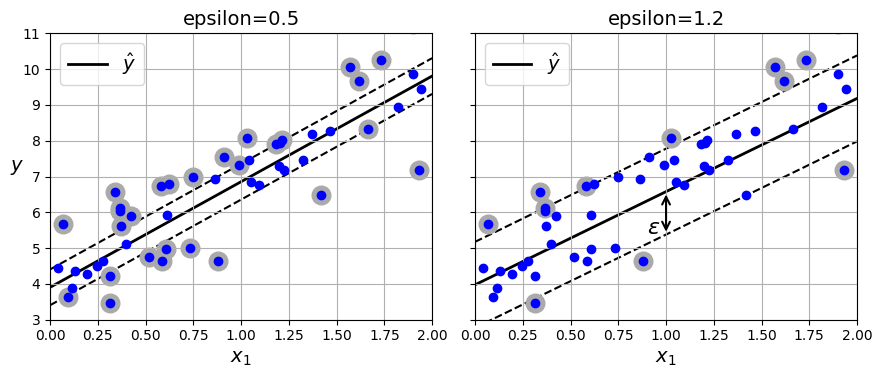

In [22]:
def find_support_vectors(svm_reg, X, y):
    # ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í Ï∞®Ïù¥Í∞Ä epsilon Ïù¥ÏÉÅÏù∏ ÏÉòÌîå Ïù∏Îç±Ïä§ Î∞òÌôò
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    # ÌöåÍ∑ÄÏÑ†Í≥º epsilon ÎßàÏßÑ ÏãúÍ∞ÅÌôî
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon

    # ÌöåÍ∑ÄÏÑ†Í≥º epsilon ÏúÑÏïÑÎûò Í≤ΩÍ≥ÑÏÑ†
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)

    # ÎßàÏßÑÏùÑ Î≤óÏñ¥ÎÇú ÏÉòÌîå (ÏßÄÏõê Î≤°ÌÑ∞Ïóê Ìï¥Îãπ)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï†ê
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

# epsilon=1.2Ïù∏ Îòê Îã§Î•∏ ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
svm_reg2 = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=1.2, dual=True, random_state=42)
)
svm_reg2.fit(X, y)

# epsilon ÎßàÏßÑÏùÑ Î≤óÏñ¥ÎÇú ÏÉòÌîå Ïù∏Îç±Ïä§ Ï†ÄÏû•
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

# epsilonÏùò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ìïú ÏßÄÏ†êÏùò ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

# Îëê Î™®Îç∏ ÎπÑÍµê ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")

# epsilon ÎßàÏßÑÏùÑ ÏãúÍ∞ÅÌôîÌïòÎäî Ïù¥Ï§ë ÌôîÏÇ¥ÌëúÏôÄ ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

# Í∑∏Î¶º Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("svm_regression_plot")
plt.show()


ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä Î¨∏Ï†úÎ•º Îã§Î£®Î†§Î©¥ Ïª§ÎÑêÏùÑ Ï†ÅÏö©Ìïú SVM Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå
Îã§Ïùå Í∑∏ÎûòÌîÑÎäî 2Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìïú SVM ÌöåÍ∑Ä ÏòàÏãú
- ÏôºÏ™Ω: Ï†ïÍ∑úÌôîÍ∞Ä Í±∞Ïùò ÏóÜÏùå ‚Üí ÌÅ∞ C Í∞í ÏÇ¨Ïö©
- Ïò§Î•∏Ï™Ω: Ï†ïÍ∑úÌôîÍ∞Ä Í∞ïÌï® ‚Üí ÏûëÏùÄ C Í∞í ÏÇ¨Ïö©

In [23]:
from sklearn.svm import SVR

# Í∞ÑÎã®Ìïú Ïù¥Ï∞® Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (y = 0.2 + 0.1x + 0.5x^2 + Ïû°Ïùå)
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# 2Ï∞® Îã§Ìï≠ Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVM ÌöåÍ∑Ä Î™®Îç∏ Íµ¨ÏÑ± Î∞è ÌïôÏäµ
svm_poly_reg = make_pipeline(
    StandardScaler(),                          # ÌäπÏÑ± ÌëúÏ§ÄÌôî
    SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)  # Îã§Ìï≠ Ïª§ÎÑê SVR
)
svm_poly_reg.fit(X, y)  # Î™®Îç∏ ÌïôÏäµ


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

Îã§Ïùå ÏΩîÎìúÎäî Scikit-LearnÏùò SVR ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©
(Ïª§ÎÑê Ìä∏Î¶≠ ÏßÄÏõê)

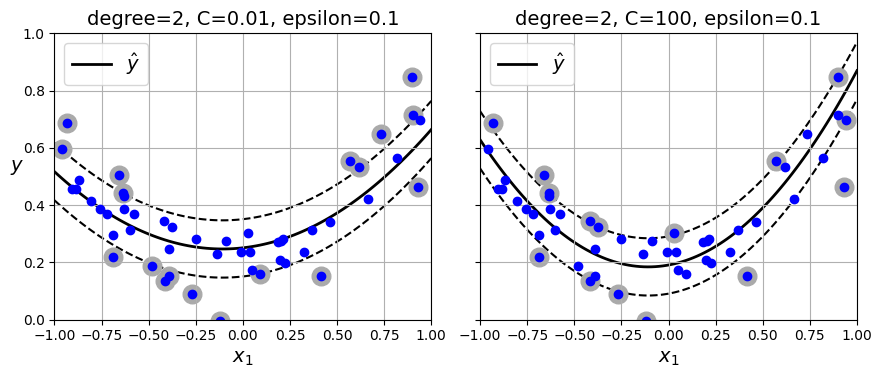

In [24]:
# SVR Î™®Îç∏ 2Í∞ú ÎπÑÍµê ÏãúÍ∞ÅÌôî

# CÍ∞Ä ÌÅ∞ SVR Î™®Îç∏ (Ï†ïÍ∑úÌôî Ï†ÅÏùå)
svm_poly_reg2 = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=100)
)
svm_poly_reg2.fit(X, y)

# ÎßàÏßÑ Î∞îÍπ• ÏÉòÌîå Ïù∏Îç±Ïä§ Ï†ÄÏû•
svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

# Îëê Î™®Îç∏ÏùÑ ÎÇòÎûÄÌûà ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Î∞è Ï∂úÎ†•
save_fig("svm_with_polynomial_kernel_plot")
plt.show()


SVR ÌÅ¥ÎûòÏä§Îäî SVCÏùò ÌöåÍ∑Ä Î≤ÑÏ†Ñ  
LinearSVR ÌÅ¥ÎûòÏä§Îäî LinearSVCÏùò ÌöåÍ∑Ä Î≤ÑÏ†Ñ  

LinearSVRÎäî ÌõàÎ†®ÏÖã ÌÅ¨Í∏∞Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÌôïÏû•  
(Ïù¥Îäî LinearSVCÏôÄ ÎèôÏùº)

Î∞òÎ©¥ SVRÎäî ÌõàÎ†®ÏÖãÏù¥ Ïª§ÏßàÏàòÎ°ù Îß§Ïö∞ ÎäêÎ†§Ïßê  
(SVCÏôÄ ÎèôÏùºÌïú ÌôïÏû•ÏÑ± ÌïúÍ≥Ñ)

SVMÏùÄ Ïù¥ÏÉÅÏπò ÌÉêÏßÄÏóêÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•  







## Under the Hood

SVMÏù¥ Ïñ¥ÎñªÍ≤å ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäîÏßÄ,
ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ïñ¥ÎñªÍ≤å ÏûëÎèôÌïòÎäîÏßÄÎ•º ÏÑ§Î™Ö

ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞Î∂ÄÌÑ∞ ÏãúÏûë

[Í∏∞Ìò∏ ÌëúÍ∏∞Î≤ï]

4Ïû•ÏóêÏÑúÎäî Î™®Îì† Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Î•º ÌïòÎÇòÏùò Î≤°ÌÑ∞ ùúÉÏóê Îã¥Îäî Î∞©Ïãù ÏÇ¨Ïö©  
(Î∞îÏù¥Ïñ¥Ïä§ Ìï≠ $ùúÉ_0$Í≥º Í∞Å ÌäπÏÑ±Ïóê ÎåÄÌïú Í∞ÄÏ§ëÏπò $ùúÉ_1$Î∂ÄÌÑ∞ $ùúÉ_ùëõ$ÍπåÏßÄ Ìè¨Ìï®,  
ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïóê Î∞îÏù¥Ïñ¥Ïä§ ÏûÖÎ†• $x_0 = 1$ÏùÑ Ï∂îÍ∞ÄÌïòÎäî Î∞©Ïãù)

SVMÏóêÏÑú Îçî Ìé∏Î¶¨ÌïòÍ≥† ÏùºÎ∞òÏ†ÅÏù∏ ÌëúÍ∏∞Î≤ï
- Î∞îÏù¥Ïñ¥Ïä§ Ìï≠: ùëè
- ÌäπÏÑ± Í∞ÄÏ§ëÏπò Î≤°ÌÑ∞: ùë§

ÏûÖÎ†• Î≤°ÌÑ∞ÏóêÎäî Î∞îÏù¥Ïñ¥Ïä§ ÌäπÏÑ± Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÏùå

### Decision Function and Predictions

ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞Îäî ÏÉàÎ°úÏö¥ ÏÉòÌîå ùë•Ïóê ÎåÄÌï¥ Í≤∞Ï†ï Ìï®Ïàò $\mathbf{w}^\top \mathbf{x} + b = w_1 x_1 + \cdots + w_n x_n + b$
Î•º Í≥ÑÏÇ∞ÌïòÏó¨ ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°

Ïù¥ Í∞íÏù¥ ÏñëÏàòÏù¥Î©¥ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ≈∑Îäî ÏñëÏùò ÌÅ¥ÎûòÏä§ (1)  
Í∑∏ Ïô∏ÏóêÎäî ÏùåÏùò ÌÅ¥ÎûòÏä§ (0) ÏòàÏ∏°

$$
\hat{y} =
\begin{cases}
0 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0 \\
1 & \text{if } \mathbf{w}^\top \mathbf{x} + b \geq 0
\end{cases}
$$


Îã§Ïùå Í∑∏ÎûòÌîÑÎäî Ïù¥Ï†Ñ Í∑∏ÎûòÌîÑÏùò ÏôºÏ™ΩÏóê ÏûàÎäî Î™®Îç∏Ïóê ÎåÄÏùëÌïòÎäî Í≤∞Ï†ï Ìï®Ïàò

Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Îëê Í∞úÏùò ÌäπÏÑ±(ÍΩÉÏûéÏùò ÎÑàÎπÑÏôÄ Í∏∏Ïù¥)ÏùÑ Í∞ÄÏßÄÎØÄÎ°ú Í≤∞Ï†ï Ìï®ÏàòÎäî 2Ï∞®Ïõê ÌèâÎ©¥  
Í≤∞Ï†ï Í≤ΩÍ≥Ñ: Í≤∞Ï†ï Ìï®ÏàòÍ∞Ä 0Ïù¥ ÎêòÎäî ÏßÄÏ†êÎì§Ïùò ÏßëÌï©ÏúºÎ°ú Îëê ÌèâÎ©¥Ïù¥ ÎßåÎÇòÎäî ÏÑ†(ÍµµÏùÄ Ïã§ÏÑ†)


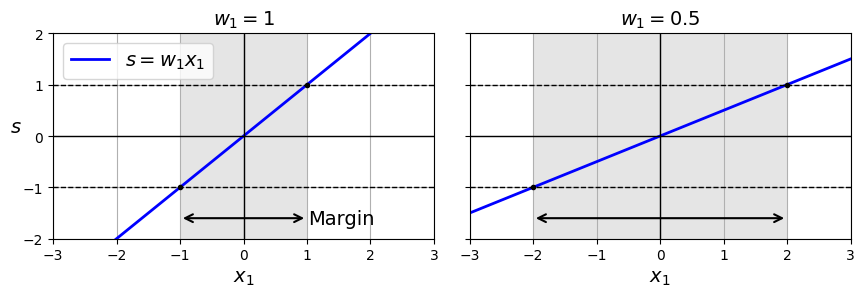

In [25]:
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)  # x1 Î≤îÏúÑ ÏÉùÏÑ±
    y = w * x1 + b  # Í≤∞Ï†ï Ìï®Ïàò Í≥ÑÏÇ∞ (ÏßÅÏÑ† ÌòïÌÉú)
    half_margin = 1 / w  # ÎßàÏßÑ Ï†àÎ∞ò Í≥ÑÏÇ∞ (wÏóê Î∞òÎπÑÎ°Ä)

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")  # Í≤∞Ï†ï Ìï®Ïàò ÏßÅÏÑ† Í∑∏Î¶¨Í∏∞
    plt.axhline(y=0, color='k', linewidth=1)  # xÏ∂ï
    plt.axvline(x=0, color='k', linewidth=1)  # yÏ∂ï

    # ÎßàÏßÑ ÏòÅÏó≠ ÏãúÍ∞ÅÌôî (ÌöåÏÉâ ÏÇ¨Í∞ÅÌòï)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)

    # ÎßàÏßÑ ÏÉÅÌïò Í≤ΩÍ≥ÑÏÑ† Í∑∏Î¶¨Í∏∞ (Ï†êÏÑ†)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)

    # ÎßàÏßÑ Í≤ΩÍ≥ÑÏ†ê ÌëúÏãú (Ï†ê)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")

    plt.axis(x1_lim + [-2, 2])  # Ï∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    plt.xlabel("$x_1$")  # xÏ∂ï ÎùºÎ≤®

    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)  # yÏ∂ï ÎùºÎ≤®
        plt.legend()  # Î≤îÎ°Ä Ï∂îÍ∞Ä
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")  # 'Margin' ÌÖçÏä§Ìä∏ ÌëúÏãú

    # ÎßàÏßÑ ÎÑàÎπÑÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî ÏåçÎ∞©Ìñ• ÌôîÏÇ¥Ìëú
    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )

    plt.title(f"$w_1 = {w}$")  # Ï†úÎ™©: Í∏∞Ïö∏Í∏∞ Í∞í ÌëúÏãú

# Îëê Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º ÎÇòÎûÄÌûà Ï∂úÎ†•
fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)  # w=1Ïù∏ Í≤ΩÏö∞ (ÎßàÏßÑ Ï¢ÅÏùå)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)  # w=0.5Ïù∏ Í≤ΩÏö∞ (ÎßàÏßÑ ÎÑìÏùå)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()


Ï†êÏÑ†: Í≤∞Ï†ï Ìï®ÏàòÏùò Í∞íÏù¥ 1 ÎòêÎäî ‚Äì1Ïù¥ ÎêòÎäî ÏßÄÏ†ê

Ïù¥ ÏÑ†Îì§ÏùÄ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄ ÌèâÌñâ, Í∞ôÏùÄ Í±∞Î¶¨ÎßåÌÅº Îñ®Ïñ¥Ï†∏ ÏûàÏñ¥ Í≤ΩÍ≥Ñ Ï£ºÏúÑÏóê ÎßàÏßÑ ÌòïÏÑ±
ÏÑ†Ìòï SVM Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµÌï®ÏùÄ Ïù¥ ÎßàÏßÑÏùÑ Í∞ÄÎä•Ìïú Ìïú ÎÑìÍ≤å ÎßåÎìúÎäî ùë§ÏôÄ ùëè Í∞íÏùÑ Ï∞æÎäî Í≤ÉÏùÑ ÏùòÎØ∏

Ïù¥Îïå ÎßàÏßÑ Ïπ®Ìï¥Î•º ÏôÑÏ†ÑÌûà ÌîºÌï®(ÌïòÎìú ÎßàÏßÑ) ÎòêÎäî ÏùºÏ†ï ÏàòÏ§ÄÍπåÏßÄ ÌóàÏö©(ÏÜåÌîÑÌä∏ ÎßàÏßÑ)

### Training Objective

Í≤∞Ï†ï Ìï®ÏàòÏùò Í∏∞Ïö∏Í∏∞Îäî Í∞ÄÏ§ëÏπò Î≤°ÌÑ∞Ïùò ÎÖ∏Î¶Ñ ‚à•ùë§‚à•Í≥º Í∞ôÏùå

Ïù¥ Í∏∞Ïö∏Í∏∞Î•º 2Î°ú ÎÇòÎàÑÎ©¥ Í≤∞Ï†ï Ìï®ÏàòÍ∞Ä ¬±1Ïù¥ ÎêòÎäî ÏßÄÏ†êÏùÄ  Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ°úÎ∂ÄÌÑ∞ Îëê Î∞∞ Îçî Î©ÄÏñ¥Ïßê  
-> Í∏∞Ïö∏Í∏∞Î•º 2Î°ú ÎÇòÎàÑÎäî Í≤ÉÏùÄ ÎßàÏßÑÏùÑ 2Î∞∞Î°ú ÎäòÎ¶¨Îäî Ìö®Í≥º

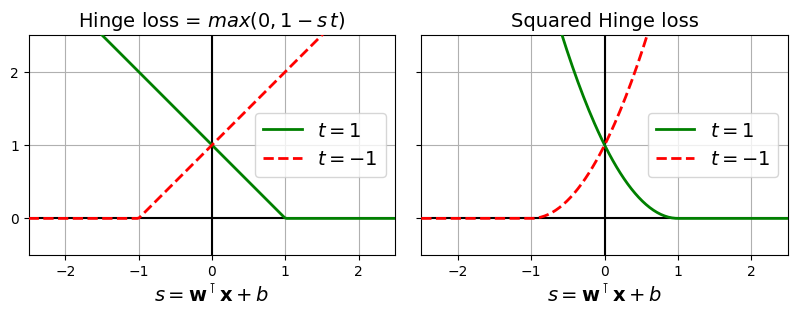

In [26]:
s = np.linspace(-2.5, 2.5, 200)  # Í≤∞Ï†ï Ìï®Ïàò Ï∂úÎ†• s Í∞í Î≤îÏúÑ ÏÉùÏÑ±
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # ÏñëÏùò ÌÅ¥ÎûòÏä§(t=1)Ïóê ÎåÄÌïú hinge ÏÜêÏã§
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # ÏùåÏùò ÌÅ¥ÎûòÏä§(t=-1)Ïóê ÎåÄÌïú hinge ÏÜêÏã§

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))  # Îëê Í∑∏ÎûòÌîÑ ÎÇòÎûÄÌûà Ï∂úÎ†•

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):

    # t=1 (ÏñëÏÑ± ÌÅ¥ÎûòÏä§)Ïóê ÎåÄÌïú ÏÜêÏã§ Ìï®Ïàò ÏãúÍ∞ÅÌôî
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")

    # t=-1 (ÏùåÏÑ± ÌÅ¥ÎûòÏä§)Ïóê ÎåÄÌïú ÏÜêÏã§ Ìï®Ïàò ÏãúÍ∞ÅÌôî
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")

    ax.grid(True)
    ax.axhline(y=0, color='k')  # y=0 Í∏∞Ï§ÄÏÑ†
    ax.axvline(x=0, color='k')  # x=0 Í∏∞Ï§ÄÏÑ†

    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")  # Í≤∞Ï†ï Ìï®Ïàò Í∞í Î†àÏù¥Î∏î
    ax.axis([-2.5, 2.5, -0.5, 2.5])  # ÏãúÍ∞ÅÌôî Î≤îÏúÑ Í≥†Ï†ï
    ax.legend(loc="center right")
    ax.set_title(title)  # Hinge / Squared Hinge Ï†úÎ™© Íµ¨Î∂Ñ
    ax.set_yticks(np.arange(0, 2.5, 1))  # yÏ∂ï ÎààÍ∏à Í≥†Ï†ï
    ax.set_aspect("equal")  # xÏ∂ï, yÏ∂ï ÎπÑÏú® ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄ (ÏôúÍ≥° Î∞©ÏßÄ)

save_fig("hinge_plot")
plt.show()


Hinge Loss
- SVMÏùò ÌïµÏã¨ ÏÜêÏã§ Ìï®ÏàòÎäî max(0, 1 - s * t)
- ÎßàÏßÑÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäî ÏòàÏ∏°(sÍ∞Ä 1Î≥¥Îã§ ÏûëÏùå)Ïóê ÎåÄÌï¥ÏÑúÎßå ÏÜêÏã§ Î∞úÏÉù
- Ïù¥ ÏÜêÏã§ÏùÄ Ï†ïÌôïÌûà Î∂ÑÎ•òÎêòÏóàÎçîÎùºÎèÑ ÎßàÏßÑ Î∞ñÏù¥Î©¥ Ìå®ÎÑêÌã∞Î•º Ï§å

Squared Hinge Loss ÎπÑÍµê
- ÎèôÏùºÌïú Íµ¨Ï°∞Ïù¥ÏßÄÎßå $(1 - s \cdot t)^2$
Î°ú, ÎßàÏßÑ ÏúÑÎ∞òÏóê ÎåÄÌï¥ Îçî Í∞ïÌïú Ìå®ÎÑêÌã∞ Î∂ÄÏó¨
- Í≤ΩÏÇ¨(gradient)Í∞Ä Ïó∞ÏÜçÏ†ÅÏù¥Í≥† Îçî ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê, ÏùºÎ∂Ä Î™®Îç∏ÏóêÏÑúÎäî Îçî Îπ†Î•∏ ÏàòÎ†¥ Ïú†ÎèÑ

ÏñëÏÑ±/ÏùåÏÑ± ÌÅ¥ÎûòÏä§ Í∞ÅÍ∞ÅÏóê ÎåÄÌïú ÏÜêÏã§ Í≥°ÏÑ† ÌôïÏù∏
- t = 1 (ÏñëÏÑ± ÌÅ¥ÎûòÏä§)Ïùº Îïå Ï¥àÎ°ùÏÉâ Ïã§ÏÑ†
- t = -1 (ÏùåÏÑ± ÌÅ¥ÎûòÏä§)Ïùº Îïå Îπ®Í∞ÑÏÉâ Ï†êÏÑ†
- ÏñëÏ™Ω Î™®ÎëêÏóêÏÑú ùë†=1 ÎòêÎäî ùë†=‚àí1 Ïù¥ÏÉÅÏù¥Î©¥ ÏÜêÏã§Ïù¥ 0Ïù¥ ÎêòÎäî Íµ¨Ï°∞Í∞Ä Î™ÖÌôïÌûà Î≥¥ÏûÑ

ÏßÅÍ¥ÄÏ†ÅÏù∏ Ìï¥ÏÑù Í∞ÄÎä•
- ÏòàÏ∏°Í∞í ùë†Í∞Ä Ïò¨Î∞îÎ•∏ Î∞©Ìñ•ÏúºÎ°ú Ï∂©Î∂ÑÌûà ÌÅ¨Î©¥ ÏÜêÏã§Ïù¥ 0
- Í≤ΩÍ≥Ñ Í∑ºÏ≤òÏóêÏÑúÎäî ÏûëÏßÄÎßå Îπ†Î•¥Í≤å Ï¶ùÍ∞ÄÌïòÎäî ÏÜêÏã§
- ÌäπÌûà soft margin SVMÏóêÏÑú C Í∞íÍ≥º Ìï®Íªò Ïù¥ ÏÜêÏã§Ïù¥ ÏµúÏ†ÅÌôî ÎåÄÏÉÅ

*Ïù¥Ìïò ÎÇ¥Ïö©ÏùÄ Ïñ¥Î†§ÏõåÏÑú Îã§ÏùåÏóê Îã§Ïãú ÎèåÏïÑÏò§Í∏∞Î°ú Ìï®*

### Quadratic Programming

### The Dual Problem

### Kernelized SVMs


### Online SVMs